In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('customer_data csv file.csv')

In [7]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [11]:
df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [13]:
df.shape

(100000, 12)

In [15]:
import seaborn as sns

<Axes: >

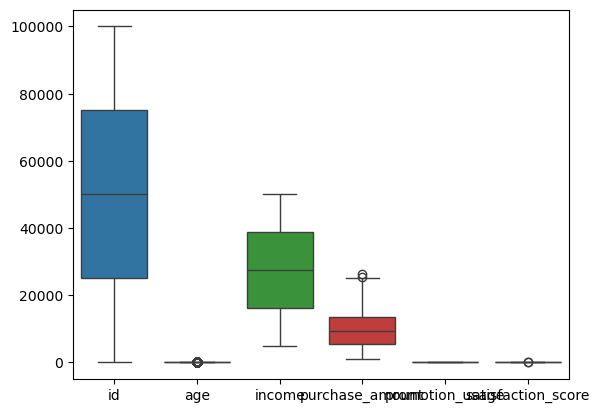

In [17]:
sns.boxplot(data=df[['id','age','income','purchase_amount','promotion_usage','satisfaction_score']])


In [18]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


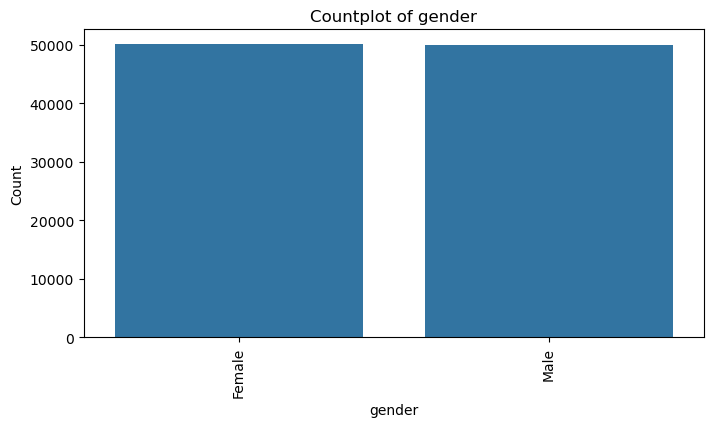

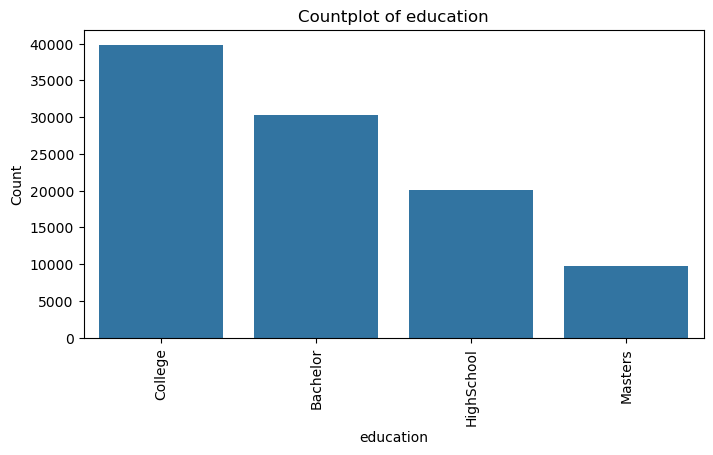

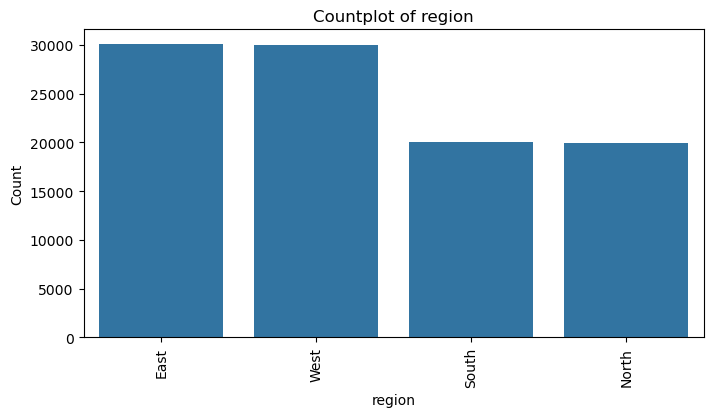

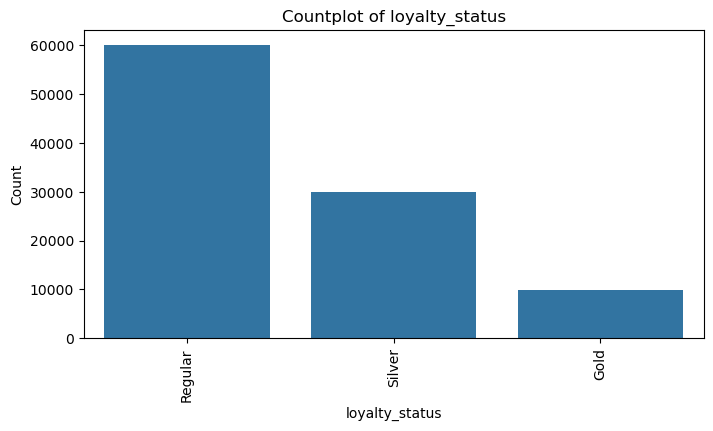

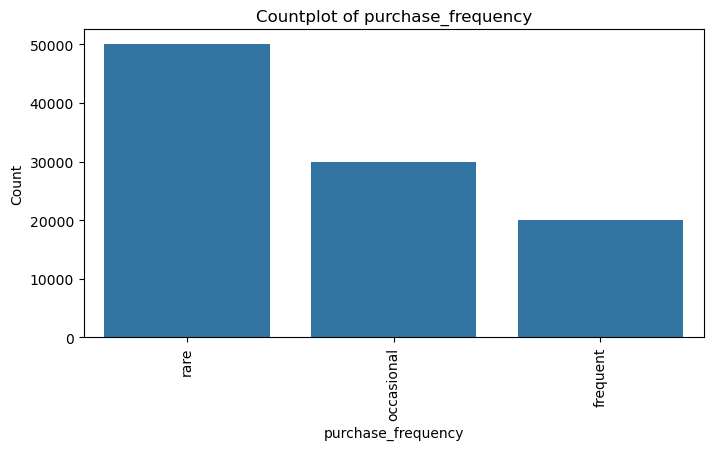

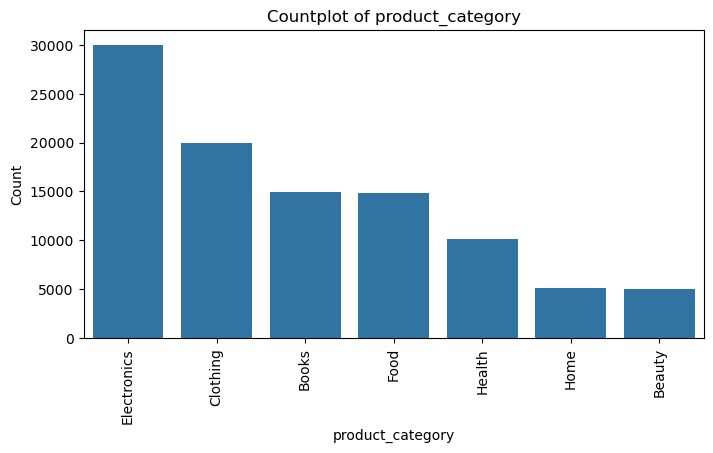

In [19]:
categorical_cols = [
    'gender','education','region','loyalty_status','purchase_frequency','product_category'
]
for col in categorical_cols:
    
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col,order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
 
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)

Text(0.5, 1.02, 'Distibution  of Numerical Features')

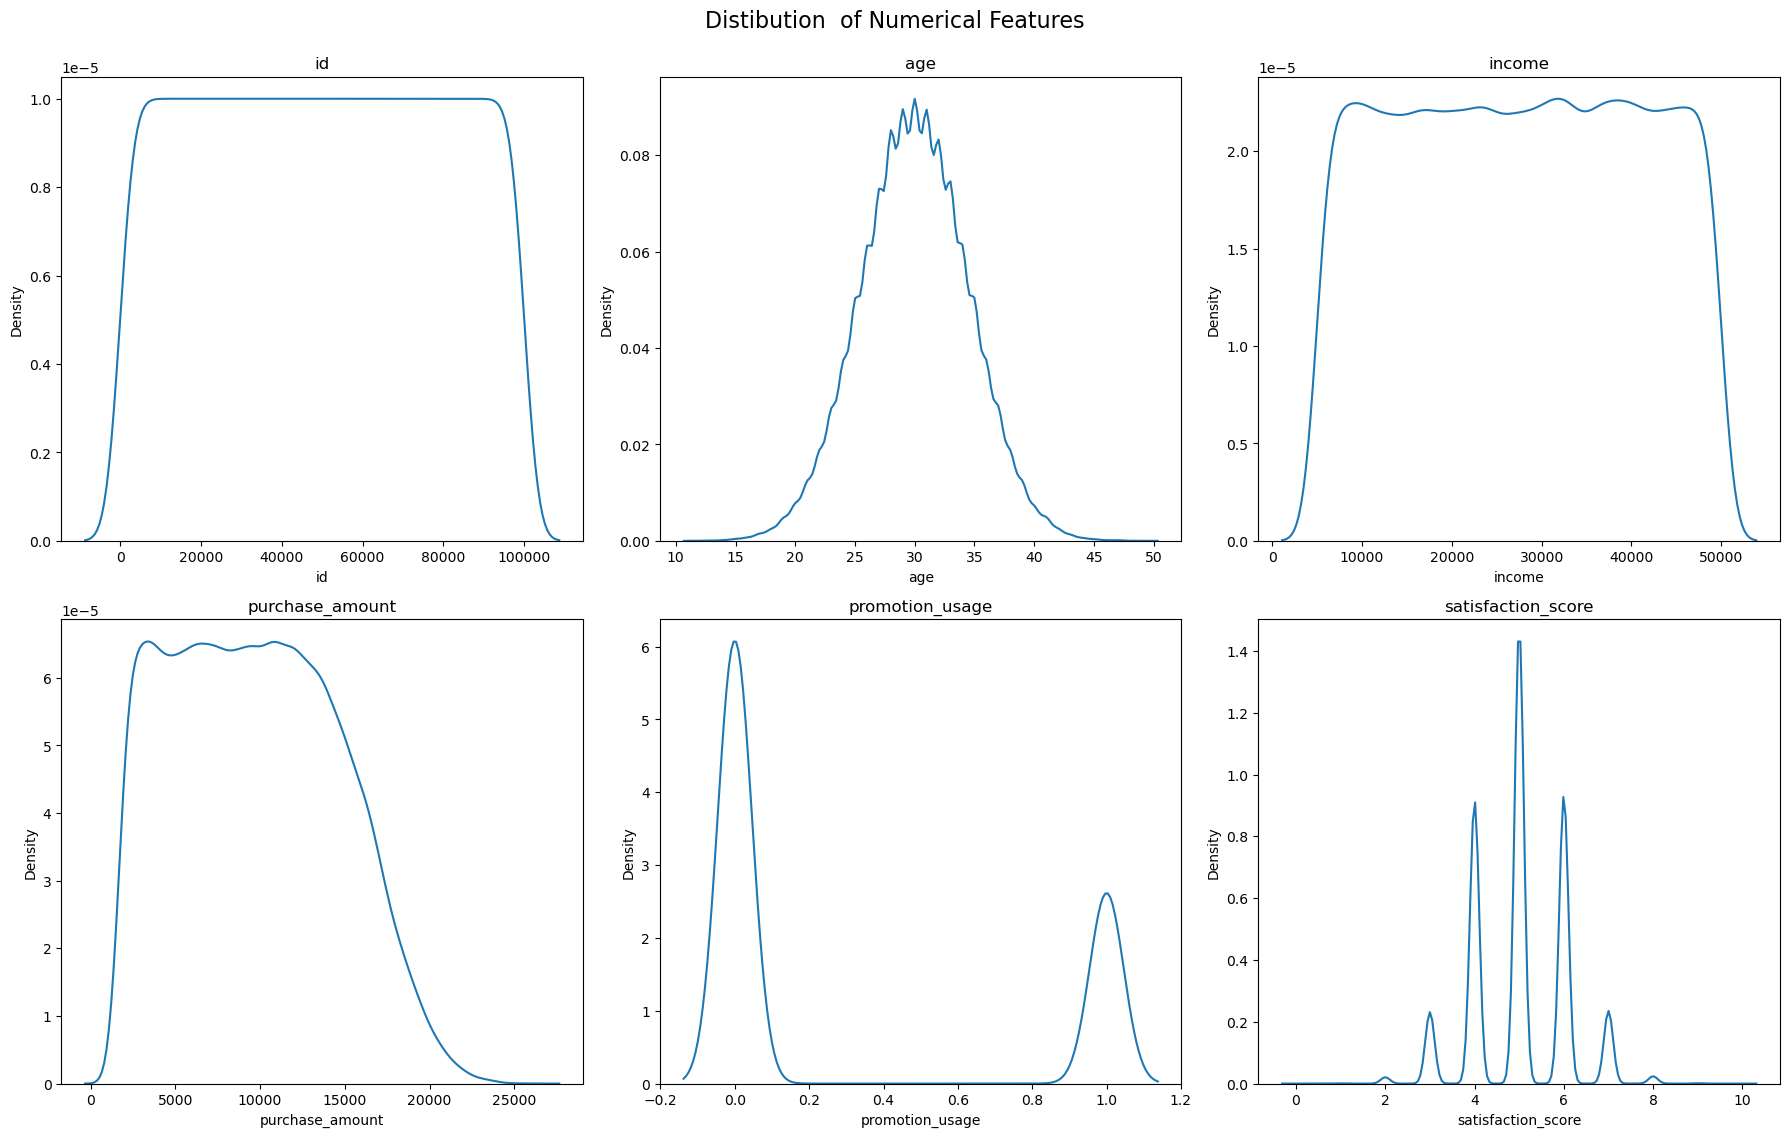

In [23]:
numerical_cols = [
    'id','age','income','purchase_amount','promotion_usage','satisfaction_score'
]



plt.figure(figsize=(18, 16))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i) 
    sns.kdeplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distibution  of Numerical Features", fontsize=16, y=1.02)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['education'] = le.fit_transform(df['education'])
df['loyalty_status'] = le.fit_transform(df['loyalty_status'])
df['region']=le.fit_transform(df['region'])
df['purchase_frequency']=le.fit_transform(df['purchase_frequency'])
df['product_category']=le.fit_transform(df['product_category'])

In [26]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,1,40682,0,0,0,0,18249,1,0,6
1,2,29,1,15317,3,3,1,2,4557,2,1,6
2,3,37,1,38849,0,3,2,2,11822,2,0,6
3,4,30,1,11568,2,2,1,0,4098,4,0,7
4,5,31,0,46952,1,1,1,1,19685,2,1,5


In [29]:
features = ['id','age', 'income','gender','education','loyalty_status','region','product_category', 'purchase_frequency', 'purchase_amount','promotion_usage','satisfaction_score']
X = df[features]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [33]:
df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [35]:
from sklearn.cluster import KMeans

In [36]:
model=KMeans(n_clusters=5,random_state=42)
df['cluster']=model.fit(scaled_data)

In [37]:
df['cluster'] = model.labels_ 

In [38]:
df['cluster'].value_counts()

cluster
1    23803
3    22902
0    22671
4    18501
2    12123
Name: count, dtype: int64

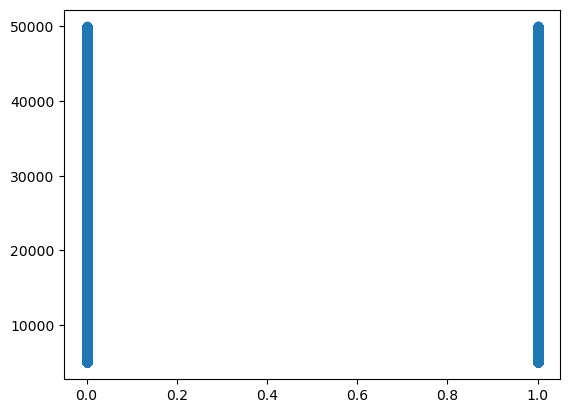

In [40]:
plt.scatter(df['gender'],df['income'])

plt.show()

In [41]:
WCSS=[]
for i in range (1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    WCSS.append(km.inertia_)

In [43]:
WCSS

[102528145979115.42,
 40028127421183.76,
 28454500399101.938,
 22910094885849.83,
 18334778899061.2,
 14220774142778.39,
 11916623096539.166,
 10855073428644.111,
 9134781879989.182,
 8519475470333.553,
 7713669986813.969,
 7142936646952.468,
 6675117290642.332,
 6005537977554.981,
 5647790457659.135,
 5232651148692.299,
 5020691399876.64,
 4692759240775.642,
 4438462817225.777,
 4206254341091.903]

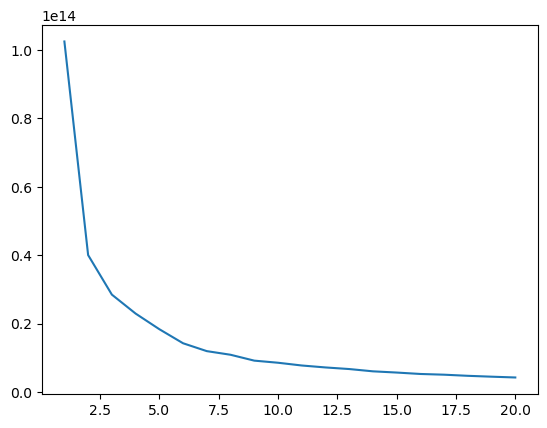

In [46]:
plt.plot(range(1,21),WCSS)

In [48]:
X=df.iloc[:,:].values

In [49]:
model=KMeans(n_clusters=5)
y_means=model.fit_predict(X)

In [50]:
y_means

array([1, 3, 1, ..., 0, 2, 0])

In [58]:
X[y_means==4,1]

array([32, 35, 36, ..., 31, 32, 22], dtype=int64)

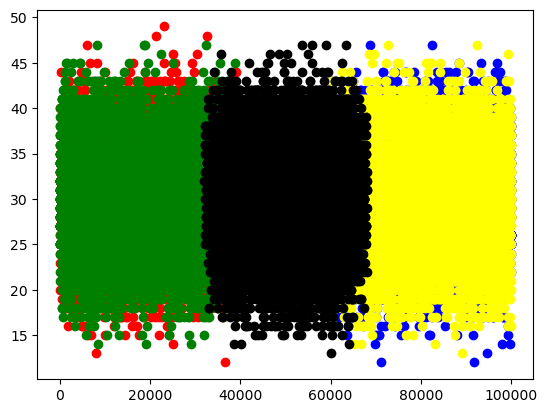

In [60]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='blue')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='red')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='yellow')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='green')
plt.scatter(X[y_means==4,0],X[y_means==4,1],color='black')

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scaled_data)

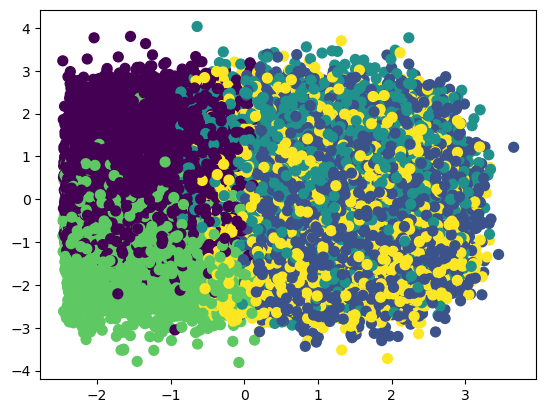

In [64]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)

In [67]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.07880859406899764


In [68]:
from sklearn.metrics import silhouette_score
for k in range(5, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"k={k}, silhouette score={score:.4f}")

k=5, silhouette score=0.0788
k=6, silhouette score=0.0795
k=7, silhouette score=0.0741
k=8, silhouette score=0.0803
k=9, silhouette score=0.0743


In [69]:
from sklearn.decomposition import PCA

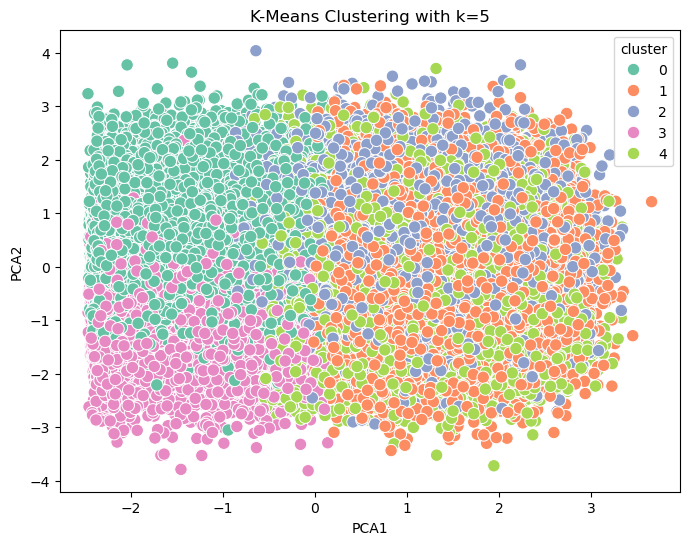

In [70]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
best_k=5
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=80)
plt.title(f"K-Means Clustering with k={best_k}")
plt.show()

In [71]:

score = silhouette_score(scaled_data, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.07432158393252208


Text(0.5, 1.0, 'Correlation Matrix')

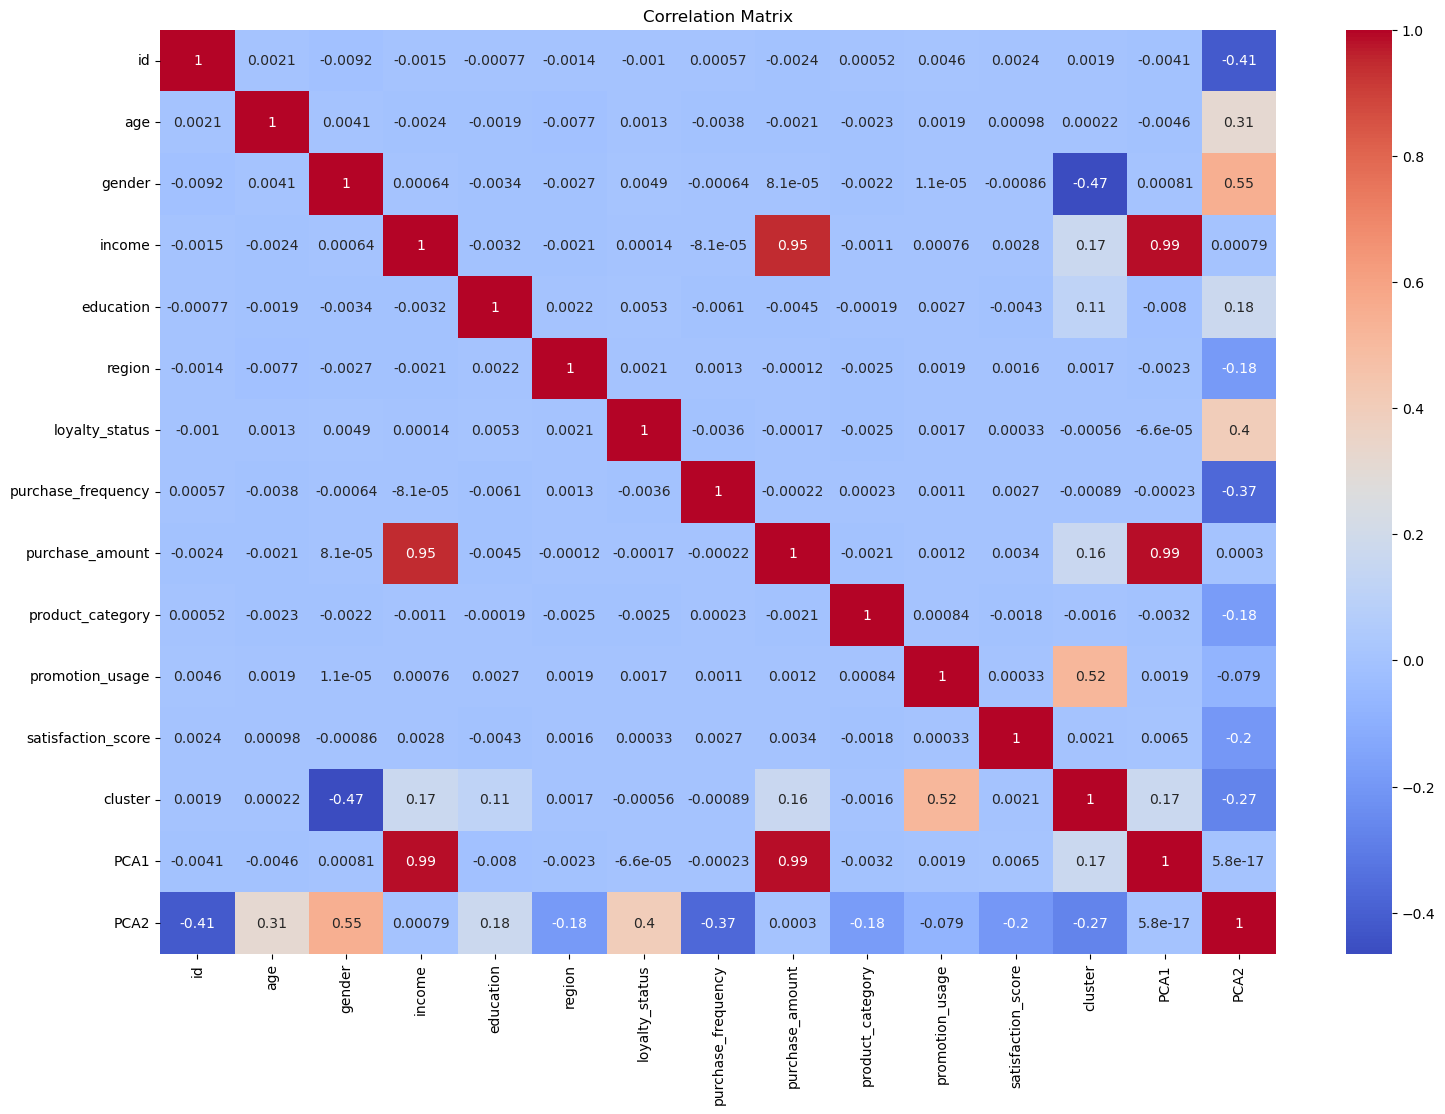

In [82]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

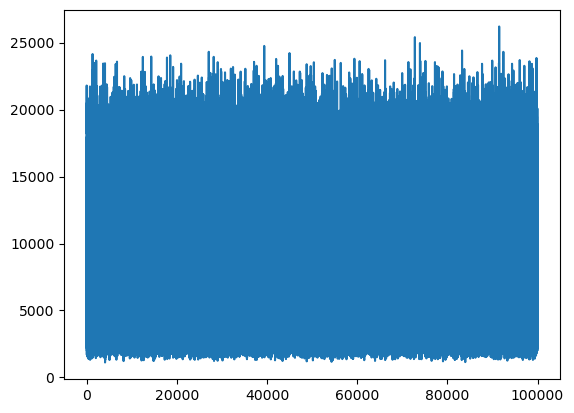

In [92]:
plt.plot(df['purchase_amount'])

In [ ]:
drop purchase amount feature y because having highly correlated 

In [108]:
df.drop(columns=['purchase_amount'],inplace=True)

In [123]:
print(df.columns)

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'product_category',
       'promotion_usage', 'satisfaction_score', 'cluster', 'PCA1', 'PCA2'],
      dtype='object')


In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [127]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

In [129]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, df['cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.11485916812983574
